# How well do jobs and skills pay for Data Analysts?

## Methodology

- Evaluate median salary for top 6 data jobs.
- Find median salary per skill for Data Analysts.
- Visualize for highest paying skills and most demanded skills.

In [2]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [4]:
df_india = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

In [5]:
job_titles = df_india['job_title_short'].value_counts().index[:6].tolist()

In [6]:
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [7]:
df_india_top6 = df_india[df_india['job_title_short'].isin(job_titles)]

In [8]:
job_order = df_india_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

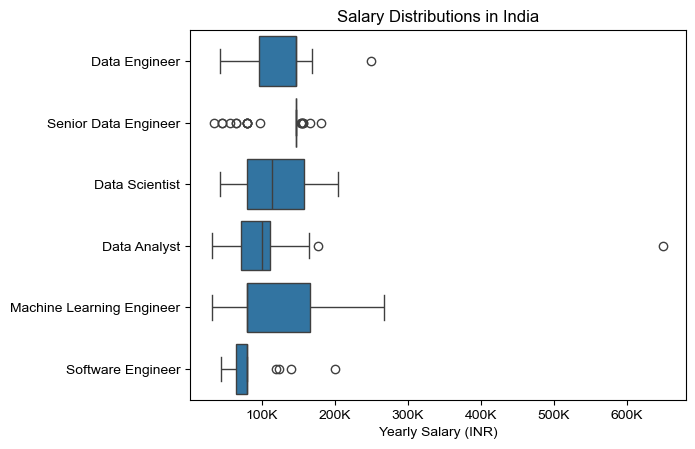

In [9]:
sns.boxplot(data=df_india_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distributions in India')
plt.xlabel('Yearly Salary (INR)')
plt.ylabel('')
ticks_x = plt.FuncFormatter(lambda y, pos: f'{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary Vs Skill for Data Analysts

In [10]:
df_DA_india = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_DA_india = df_DA_india.dropna(subset = ['salary_year_avg'])

In [11]:
df_DA_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,"[python, sql, aws, azure, excel, jenkins, git]","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
27487,Data Analyst,Data Architect 2023,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-12 13:14:51,True,False,India,year,165000.0,NaN,Bosch Group,"[mongo, sql, python, mongodb, mongodb, sql ser...","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
29583,Data Analyst,Senior Business & Data Analyst,India,via Ai-Jobs.net,Full-time,False,India,2023-11-21 13:12:12,False,False,India,year,119250.0,NaN,Deutsche Bank,"[sql, visio, excel, jira, confluence]","{'analyst_tools': ['visio', 'excel'], 'async':..."
32890,Data Analyst,Data Analyst - Transport,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 13:34:25,True,False,India,year,105000.0,NaN,GoTo Group,"[sql, swift, tableau, git]","{'analyst_tools': ['tableau'], 'other': ['git'..."
41257,Data Analyst,Junior Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-08-08 06:13:06,False,False,India,year,57500.0,NaN,WPP,"[sql, alteryx]","{'analyst_tools': ['alteryx'], 'programming': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774606,Data Analyst,Financial Data Analyst,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-04-11 01:10:35,False,False,India,year,79200.0,NaN,Visa,"[python, r, vba, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
774809,Data Analyst,IN RBIN Dy. Manager/ Asst Manager Data Analyst...,"Nashik, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-28 01:21:16,False,False,India,year,102500.0,NaN,Bosch Group,"[python, sql, pandas, numpy, excel, sharepoint]","{'analyst_tools': ['excel', 'sharepoint'], 'li..."
777313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-01-10 05:12:09,False,False,India,year,111202.0,NaN,Poshmark,"[sql, python, r, spark, express, excel, looker...","{'analyst_tools': ['excel', 'looker', 'powerpo..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"


In [12]:
df_DA_india = df_DA_india.explode(['job_skills'])

In [13]:
df_DA_top_pay = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

In [14]:
df_DA_top_pay = df_DA_top_pay.head(10)

In [15]:
df_DA_top_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [16]:
df_skills = df_DA_india.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

In [17]:
df_skills = df_skills.head(10)

df_skills

,count,median
job_skills,,
sql,46,96050.0
excel,39,98500.0
python,36,96050.0
tableau,20,108087.5
r,18,79200.0
power bi,17,111175.0
azure,15,93600.0
aws,12,79200.0
oracle,11,79200.0


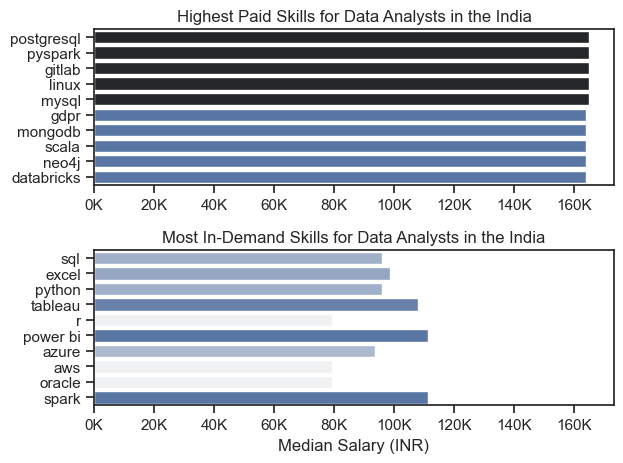

In [18]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_skills, x='median', y=df_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (INR)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

most_indemand_skills = df_skills.sort_values(by='median', ascending=False)

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()